<a href="https://colab.research.google.com/github/wahyunh10/Exploratory-Data-Analysis-Supermarket-Sales/blob/main/EDA_Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

These are going to be insights about each sales condition in three branches of supermarket, where data cleansing is undertaken before. There is also data correlation process

Import Libraries and File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
smsales=pd.read_csv('supermarket_sales - Sheet1.csv')
smsales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
smsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Cleansing Data**

In [3]:
# Find Q1, Q3, and, IQR for detecting outlier
Q1=smsales.quantile(0.25)
Q3=smsales.quantile(0.75)
IQR=Q3-Q1
IQR

Unit price                  45.060000
Quantity                     5.000000
Tax 5%                      16.520375
Total                      346.927875
cogs                       330.407500
gross margin percentage      0.000000
gross income                16.520375
Rating                       3.000000
dtype: float64

In [4]:
# Check missing value, duplicate record, and outlier presence
columns=['Column Name', 'NaN Count', 'Duplicate Record Availability', 'Unique Data Count', 'Outlier Availability']
value_desc=[]
for i in smsales.columns:
    def outa(i):
        if i in IQR:
            outlier=str(((smsales[i]<(Q1[i]-1.5*IQR[i]))|(smsales[i]>(Q3[i]+1.5*IQR[i]))).value_counts()).replace('\n', ' ')
            return outlier
        else:
            ct='categorical data'
            return ct
    value_desc.append([i, 
                      sum(smsales[i].isnull()),
                      sum(smsales.duplicated()),
                      smsales[i].nunique(),
                        outa(i)])
info_table=pd.DataFrame(columns=columns, data=value_desc)
info_table

,Column Name,NaN Count,Duplicate Record Availability,Unique Data Count,Outlier Availability
0,Invoice ID,0,0,1000,categorical data
1,Branch,0,0,3,categorical data
2,City,0,0,3,categorical data
3,Customer type,0,0,2,categorical data
4,Gender,0,0,2,categorical data
5,Product line,0,0,6,categorical data
6,Unit price,0,0,943,"False 1000 Name: Unit price, dtype: int64"
7,Quantity,0,0,10,"False 1000 Name: Quantity, dtype: int64"
8,Tax 5%,0,0,990,"False 991 True 9 Name: Tax 5%, dtype:..."
9,Total,0,0,990,"False 991 True 9 Name: Total, dtype: ..."


In [5]:
# Grouping column which has outlier
column_w_outlier=[]
for i, j in zip(info_table['Outlier Availability'], info_table['Column Name']):
    if 'True' in i.split():
        column_w_outlier.append(j)
        
print('Columns with outlier: ')
for column in column_w_outlier:
    print(column)

Columns with outlier: 
Tax 5%
Total
cogs
gross income


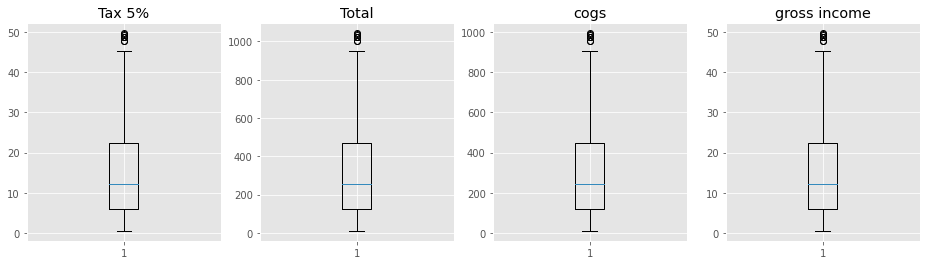

In [6]:
# Presence outlier in box plot
fig, axs=plt.subplots(nrows=1, ncols=4, figsize=(16,4))

axc=0
for j in column_w_outlier:
    axs[axc].boxplot(smsales[j])
    axs[axc].set_title(j)
    axc+=1

In [7]:
# Handling outlier
for j in column_w_outlier:
    lower_range=Q1[j]-1.5*IQR[j]
    upper_range=Q3[j]+1.5*IQR[j]
    smsales[j]=np.where(smsales[j]>upper_range, upper_range, smsales[j])
    smsales[j]=np.where(smsales[j]<lower_range, lower_range, smsales[j])

In [8]:
# Confirm outliers are removed
for j in column_w_outlier:
    def outa(j):
        if j in IQR:
            outlier=str(((smsales[j]<(Q1[j]-1.5*IQR[j]))|(smsales[j]>(Q3[j]+1.5*IQR[j]))).value_counts()).replace('\n', ' ')
            return outlier
        else:
            ct='categorical data'
            return ct
    print(outa(j))

False    1000 Name: Tax 5%, dtype: int64
False    1000 Name: Total, dtype: int64
False    1000 Name: cogs, dtype: int64
False    1000 Name: gross income, dtype: int64


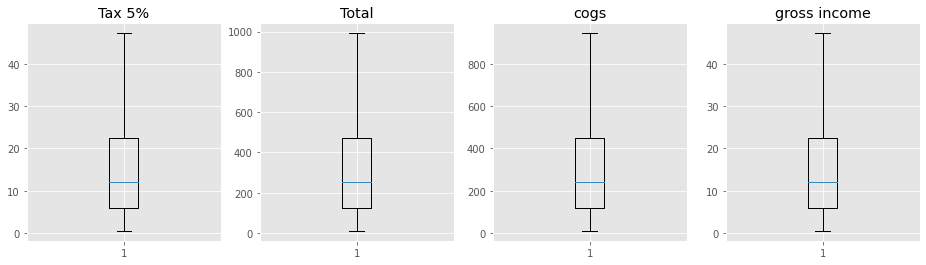

In [9]:
fig, axs=plt.subplots(nrows=1, ncols=4, figsize=(16,4))

axc=0
for j in column_w_outlier:
    axs[axc].boxplot(smsales[j])
    axs[axc].set_title(j)
    axc+=1

**Analyzing and Finding Insights**

In [10]:
smsales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Net sales in each branch**

In [11]:
netsales=round(smsales.groupby('Branch').mean()['Total'],2).sort_values()
branch=netsales.index

netsales

Branch
A    312.21
B    319.69
C    336.56
Name: Total, dtype: float64

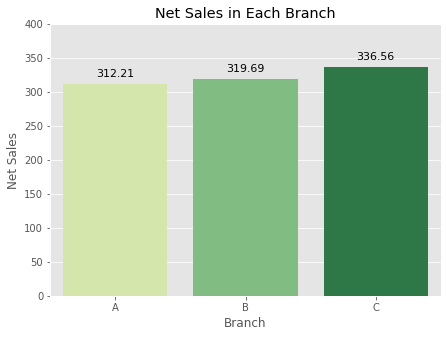

In [12]:
plt.figure(figsize=(7,5))
plot=sns.barplot(x=branch, y=netsales, palette='YlGn')
plot.set_title('Net Sales in Each Branch')
plot.set_ylabel('Net Sales')
plot.set_ylim(0,400)

for p in plot.patches:
             plot.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')

Branch C is the branch with the biggest total or net sales compared to the other two branches

**The number of product lines sold in each branch**

In [ ]:
branch=smsales['Branch'].unique()
pq=smsales.groupby(['Product line', 'Branch']).sum()['Quantity']
pl1=pq['Electronic accessories']
pl2=pq['Fashion accessories']
pl3=pq['Food and beverages']
pl4=pq['Health and beauty']
pl5=pq['Home and lifestyle']
pl6=pq['Sports and travel']

pq

In [ ]:
fig, axs=plt.subplots(figsize=(7,5))
axs.bar(branch,pl1, label='Electronic accessories', color='c')
axs.bar(branch,pl2, bottom=pl1, label='Fashion accessories', color='wheat')
axs.bar(branch, pl3, bottom=[pl1+pl2 for pl1, pl2 in zip(pl1, pl2)], label='Food and beverages', color='orange')
axs.bar(branch, pl4, bottom=[pl1+pl2+pl3 for pl1, pl2,pl3 in zip(pl1, pl2, pl3)], label='Health and beauty', color='olivedrab')
axs.bar(branch,pl5, bottom=[pl1+pl2+pl3+pl4 for pl1, pl2, pl3, pl4 in zip(pl1, pl2, pl3, pl4)], label='Home and lifestyle', color='burlywood')
axs.bar(branch,pl6, bottom=[pl1+pl2+pl3+pl4+pl5 for pl1, pl2,pl3, pl4, pl5 in zip(pl1, pl2, pl3, pl4, pl5)], label='Sports and travel',color='indianred')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Branch')
plt.ylabel('Quantity')
plt.title('The Number of Product Lines Sold in Each Branch')

for xpos, ypos, yval in zip(branch, pl1/2, pl1):
    plt.text(xpos, ypos, yval, ha='center', va='center')
for xpos, ypos, yval in zip(branch, pl1+pl2/2, pl2):
    plt.text(xpos, ypos, yval, ha='center', va='center')
for xpos, ypos, yval in zip(branch, pl1+pl2+pl3/2, pl3):
    plt.text(xpos, ypos, yval, ha='center', va='center')
for xpos, ypos, yval in zip(branch, pl1+pl2+pl3+pl4/2, pl4):
    plt.text(xpos, ypos, yval, ha='center', va='center')
for xpos, ypos, yval in zip(branch, pl1+pl2+pl3+pl4+pl5/2, pl5):
    plt.text(xpos, ypos, yval, ha='center', va='center')
for xpos, ypos, yval in zip(branch, pl1+pl2+pl3+pl4+pl5+pl6/2, pl6):
    plt.text(xpos, ypos, yval, ha='center', va='center')

From the plot, home and lifestyle line is the most sold in branch A, food and beverages is the most sold in branch B, and sports and travel is the most sold in branch C

**Sold-hour in each branch**

In [ ]:
print(smsales['Time'].dtypes)
time=pd.to_datetime(smsales['Time'], format='%H:%M').dt.hour

In [ ]:
plot1=sns.displot(smsales, x=time, col='Branch', kind='hist', binwidth=1, color='cadetblue')
plt.subplots_adjust(top=0.85)
plot1.fig.suptitle('Sold Hour in Each Branch',fontsize=18);

Sales peak in all three branches mostly happened between 7 pm to 8 pm. The value for all branches quite steady in the hours before

**Rating distribution in each branch**

In [ ]:
plot2=sns.displot(smsales, x='Rating', col='Branch', kind='hist', binwidth=1, color='firebrick')
plt.subplots_adjust(top=0.85)
plot2.fig.suptitle('Rating Distribution in Each Branch',fontsize=18);

Branch A highest ratings are between 7 to 8, branch B and C are between 6 to 7

**Comparing total toward rating**

In [ ]:
sns.jointplot(x='Rating', y='Total', data=smsales, color='peru', marginal_kws={'alpha': 0.8});

The rating distribution toward how many sales executed is quite a variate. Whereas, the sales count tend to decrease in increasing the receipt value